In [1]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def maximize_money(sizes, money, limit):
    sizes_int = [int(s * 1) for s in sizes]

    n = len(sizes_int)
    dp = [[0] * (limit + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(1, limit + 1):
            if sizes_int[i - 1] <= j:
                dp[i][j] = max(dp[i - 1][j], money[i - 1] + dp[i - 1][j - sizes_int[i - 1]])
            else:
                dp[i][j] = dp[i - 1][j]

    selected_projects = []
    i, j = n, limit

    # Iterate backward through the dp table to find the selected projects
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            # If the value changes, it means we picked the i-th project
            selected_projects.append(i - 1)
            j -= sizes_int[i - 1]
        i -= 1

    selected_projects.reverse()
    return selected_projects


In [3]:
#Example
sizes = [2500, 1500, 2000, 1100, 5000]
moneys = [10, 8, 4, 3, 15]
limit_of_project = 3000

selected_projects = maximize_money(sizes, moneys, limit_of_project)
total_money = sum(moneys[i] for i in selected_projects)

print("Selected projects:", selected_projects)
print("Total money earned:", total_money)

Selected projects: [1, 3]
Total money earned: 11


In [4]:
def shuffle_list(input_list):
    random.shuffle(input_list)
def create_batches(input_list, batch_size):
    shuffle_list(input_list)
    return [input_list[i:i + batch_size] for i in range(0, len(input_list), batch_size)]

## constant rewarddemand vs dynamic hashcapacity

In [5]:
def fake_transactions_generator(size):
    sizes=np.random.randint(500,5000,size).tolist();
    rewards=np.random.randint(2,100,size).tolist();
    
    transactions=[];
    
    for i in range(len(sizes)):
        d={'size':sizes[i],'reward':rewards[i]};
        transactions.append(d);
    return transactions;

In [6]:
def fake_miners_generator(size):
    minimumrewards=np.ones(size)*16;
    hashcapacities=np.random.randint(1,20,size);
    
    miners=[];
    for i in range(size):
        d={'rewardsdemand':minimumrewards[i],'hashcapacity':hashcapacities[i],'currenttransactions':[],'handledtransactions':[]};
        miners.append(d);
    
    return miners

In [7]:
transactions_pool=fake_transactions_generator(200)
transactions_pool=sorted(transactions_pool,key=lambda a:a['reward']);
miners_pool=fake_miners_generator(20)
miners_pool=sorted(miners_pool,key=lambda a:a['hashcapacity'])

In [8]:
t_pool=transactions_pool
m_pool=miners_pool

In [9]:
minimum_rewards=min(miners_pool,key=lambda a: a['rewardsdemand'])['rewardsdemand']
filtered=list(filter(lambda a: a['size']<=3500,t_pool));
filtered=list(filter(lambda a:a['reward']>=minimum_rewards,filtered));
non_filtered = [d for d in t_pool if d not in filtered]
t_pool.clear();
t_pool.extend(non_filtered);

In [10]:
len(filtered)+len(non_filtered)

200

In [11]:
def delete_after_delay(lst, element, delay):
    time.sleep(delay)
    if element in lst:
        lst.remove(element)

def deletefunc(miner):
    for i in miner['currenttransactions'][:]: 
        miner['handledtransactions'].append(i);
        delete_after_delay(miner['currenttransactions'], i, len(miner['currenttransactions'])/miner['hashcapacity'])

In [12]:
free_miners=m_pool.copy();
busy_miners=[];

while len(filtered)!=0:
    sizes=[i['size'] for i in filtered]
    rewards=[i['reward'] for i in filtered]
    selected=maximize_money(sizes,rewards,3500);
        
    if(len(free_miners)==0):
        while len(busy_miners)!=0:
            popped=busy_miners.pop();
            deletefunc(popped);
            free_miners.append(popped);
        sorted(free_miners,key=lambda a:a['hashcapacity'])
        continue;
            
    else:
        sorted(free_miners,key=lambda a:a['hashcapacity']);
        selected_miner=free_miners.pop();
    
    for i in reversed(selected):
        if (filtered[i]['reward']>=selected_miner['rewardsdemand']):
            selected_miner['currenttransactions'].append(filtered[i]);
            print(filtered[i]);
            del filtered[i]
        
        else:
            continue;
        if selected_miner not in busy_miners:    
            busy_miners.append(selected_miner);

{'size': 1074, 'reward': 94}
{'size': 931, 'reward': 91}
{'size': 725, 'reward': 71}
{'size': 726, 'reward': 68}
{'size': 1101, 'reward': 89}
{'size': 1034, 'reward': 87}
{'size': 717, 'reward': 63}
{'size': 642, 'reward': 59}
{'size': 1306, 'reward': 86}
{'size': 898, 'reward': 78}
{'size': 734, 'reward': 67}
{'size': 527, 'reward': 45}
{'size': 1526, 'reward': 97}
{'size': 1115, 'reward': 73}
{'size': 818, 'reward': 63}
{'size': 1376, 'reward': 89}
{'size': 1433, 'reward': 77}
{'size': 618, 'reward': 40}
{'size': 1241, 'reward': 76}
{'size': 1168, 'reward': 71}
{'size': 1087, 'reward': 34}
{'size': 1473, 'reward': 77}
{'size': 1376, 'reward': 66}
{'size': 542, 'reward': 25}
{'size': 1659, 'reward': 75}
{'size': 1569, 'reward': 69}
{'size': 2045, 'reward': 99}
{'size': 1327, 'reward': 44}
{'size': 1857, 'reward': 71}
{'size': 1640, 'reward': 66}
{'size': 1981, 'reward': 83}
{'size': 1470, 'reward': 49}
{'size': 1968, 'reward': 78}
{'size': 1474, 'reward': 49}
{'size': 2411, 'reward': 

In [13]:
while len(busy_miners)!=0:
    popped=busy_miners.pop();
    deletefunc(popped);
    free_miners.append(popped);

In [14]:
free_miners

[{'rewardsdemand': 16.0,
  'hashcapacity': 1,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2503, 'reward': 94},
   {'size': 3497, 'reward': 63},
   {'size': 2160, 'reward': 36}]},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 3138, 'reward': 94},
   {'size': 3074, 'reward': 64},
   {'size': 2694, 'reward': 43}]},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 3025, 'reward': 95},
   {'size': 1943, 'reward': 64},
   {'size': 3239, 'reward': 43}]},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 1763, 'reward': 49},
   {'size': 1653, 'reward': 48},
   {'size': 3324, 'reward': 65},
   {'size': 2492, 'reward': 44}]},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 3070, 'reward': 99},
   {'size': 3327, 'reward': 66},
   {'si

In [15]:
sorted(m_pool,key=lambda a:a['hashcapacity']);

In [16]:
for i in m_pool:
    miner=i;
    total=0;
    for i in miner['handledtransactions']:
        total=total+i['reward'];
    miner['total_earning']= total;

In [17]:
sorted(m_pool,key=lambda a:a['hashcapacity'],reverse=True);

In [18]:
m_pool

[{'rewardsdemand': 16.0,
  'hashcapacity': 1,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2503, 'reward': 94},
   {'size': 3497, 'reward': 63},
   {'size': 2160, 'reward': 36}],
  'total_earning': 193},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 3138, 'reward': 94},
   {'size': 3074, 'reward': 64},
   {'size': 2694, 'reward': 43}],
  'total_earning': 201},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 3025, 'reward': 95},
   {'size': 1943, 'reward': 64},
   {'size': 3239, 'reward': 43}],
  'total_earning': 202},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 1763, 'reward': 49},
   {'size': 1653, 'reward': 48},
   {'size': 3324, 'reward': 65},
   {'size': 2492, 'reward': 44}],
  'total_earning': 206},
 {'rewardsdemand': 16.0,
  'hashcapacity': 2,
  'currenttransactions': [],


In [19]:
total_rewards=[];
hashcapacities=[];

In [20]:
for i in m_pool:
    total_rewards.append(i['total_earning']);
    hashcapacities.append(i['hashcapacity']);

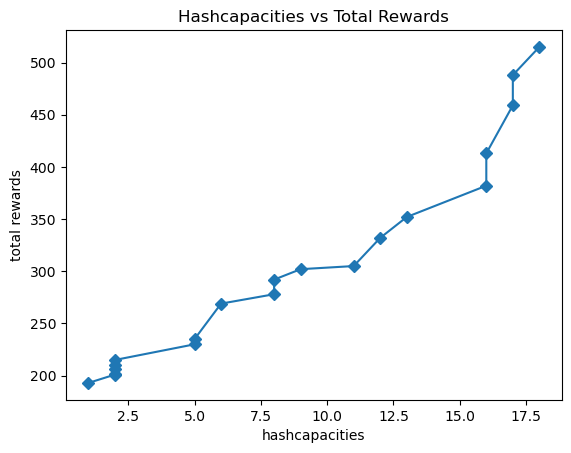

In [21]:
plt.xlabel('hashcapacities');
plt.ylabel('total rewards');
plt.title('Hashcapacities vs Total Rewards');
plt.plot(hashcapacities,total_rewards,marker='D');

## constant hashcapacity vs dynamic rewarddemands

In [103]:
def fake_miners_generator(size):
    minimumrewards=np.random.randint(5,100,size);
    hashcapacities=np.ones(size)*15;
    
    miners=[];
    for i in range(size):
        d={'rewardsdemand':minimumrewards[i],'hashcapacity':hashcapacities[i],'currenttransactions':[],'handledtransactions':[]};
        miners.append(d);
    
    return miners

In [104]:
transactions_pool=fake_transactions_generator(200)
transactions_pool=sorted(transactions_pool,key=lambda a:a['reward']);
miners_pool=fake_miners_generator(20)
miners_pool=sorted(miners_pool,key=lambda a:a['hashcapacity'])

In [105]:
t_pool=transactions_pool
m_pool=miners_pool

In [106]:
minimum_rewards=min(miners_pool,key=lambda a: a['rewardsdemand'])['rewardsdemand']
filtered=list(filter(lambda a: a['size']<=3500,t_pool));
filtered=list(filter(lambda a:a['reward']>=minimum_rewards,filtered));
non_filtered = [d for d in t_pool if d not in filtered]
t_pool.clear();
t_pool.extend(non_filtered);

In [107]:
len(filtered)+len(non_filtered)

200

In [108]:
def delete_after_delay(lst, element, delay):
    time.sleep(delay)
    if element in lst:
        lst.remove(element)

def deletefunc(miner):
    for i in miner['currenttransactions'][:]: 
        miner['handledtransactions'].append(i);
        delete_after_delay(miner['currenttransactions'], i, len(miner['currenttransactions'])/miner['hashcapacity'])

In [129]:
free_miners=m_pool.copy();
busy_miners=[];

while len(filtered)!=0:
    sizes=[i['size'] for i in filtered]
    rewards=[i['reward'] for i in filtered]
    selected=maximize_money(sizes,rewards,3500);
        
    if(len(free_miners)==0):
        while len(busy_miners)!=0:
            popped=busy_miners.pop();
            deletefunc(popped);
            free_miners.append(popped);
        sorted(free_miners,key=lambda a:a['hashcapacities'])
        continue;
            
    else:
        sorted(free_miners,key=lambda a:a['hashcapacities']);
        selected_miner=free_miners.pop();
    
    for i in reversed(selected):
        if (filtered[i]['reward']>=selected_miner['rewardsdemand']):
            selected_miner['currenttransactions'].append(filtered[i]);
            print(filtered[i]);
            del filtered[i]
        
        else:
            continue;
        if selected_miner not in busy_miners:    
            busy_miners.append(selected_miner);

In [130]:
while len(busy_miners)!=0:
    popped=busy_miners.pop();
    deletefunc(popped);
    free_miners.append(popped);

In [131]:
free_miners

[{'rewardsdemand': 98,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [],
  'total_earning': 0},
 {'rewardsdemand': 96,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [],
  'total_earning': 0},
 {'rewardsdemand': 95,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2316, 'reward': 95}],
  'total_earning': 95},
 {'rewardsdemand': 79,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2116, 'reward': 96}],
  'total_earning': 96},
 {'rewardsdemand': 72,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2017, 'reward': 85}],
  'total_earning': 85},
 {'rewardsdemand': 72,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 1801, 'reward': 85},
   {'size': 1637, 'reward': 84}],
  'total_earning': 169},
 {'rewardsdemand': 72,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'han

In [132]:
sorted(m_pool,key=lambda a:a['hashcapacity']);

In [133]:
for i in m_pool:
    miner=i;
    total=0;
    for i in miner['handledtransactions']:
        total=total+i['reward'];
    miner['total_earning']= total;

In [134]:
m_pool=sorted(m_pool,key=lambda a:a['rewardsdemand'],reverse=True);

In [135]:
m_pool

[{'rewardsdemand': 98,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [],
  'total_earning': 0},
 {'rewardsdemand': 96,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [],
  'total_earning': 0},
 {'rewardsdemand': 95,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2316, 'reward': 95}],
  'total_earning': 95},
 {'rewardsdemand': 79,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2116, 'reward': 96}],
  'total_earning': 96},
 {'rewardsdemand': 72,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2017, 'reward': 85}],
  'total_earning': 85},
 {'rewardsdemand': 72,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'handledtransactions': [{'size': 1801, 'reward': 85},
   {'size': 1637, 'reward': 84}],
  'total_earning': 169},
 {'rewardsdemand': 72,
  'hashcapacity': 15.0,
  'currenttransactions': [],
  'han

In [136]:
total_rewards=[];
rewardsdemand=[];

In [137]:
for i in m_pool:
    total_rewards.append(i['total_earning']);
    rewardsdemand.append(i['rewardsdemand']);

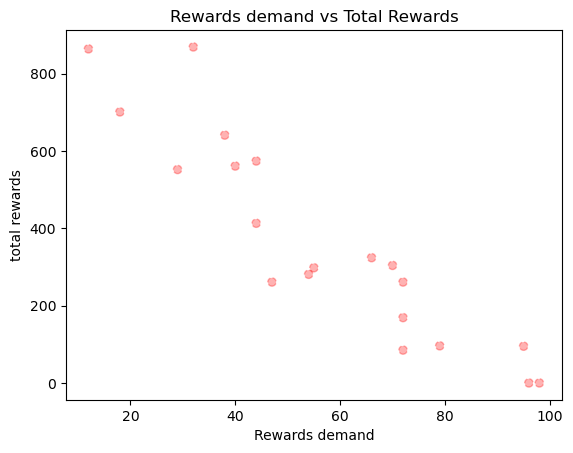

In [139]:
plt.xlabel('Rewards demand');
plt.ylabel('total rewards');
plt.title('Rewards demand vs Total Rewards');
plt.scatter(rewardsdemand,total_rewards,marker='o',alpha=0.3,color='red');

## Dynamic Hashcapacities and rewards demand

In [86]:
def fake_miners_generator(size):
    minimumrewards=np.random.randint(5,100,size);
    hashcapacities=np.random.randint(1,20,size);
    
    miners=[];
    for i in range(size):
        d={'rewardsdemand':minimumrewards[i],'hashcapacity':hashcapacities[i],'currenttransactions':[],'handledtransactions':[]};
        miners.append(d);
    
    return miners

In [87]:
transactions_pool=fake_transactions_generator(200)
transactions_pool=sorted(transactions_pool,key=lambda a:a['reward']);
miners_pool=fake_miners_generator(20)
miners_pool=sorted(miners_pool,key=lambda a:a['hashcapacity'])

In [88]:
t_pool=transactions_pool
m_pool=miners_pool

In [89]:
minimum_rewards=min(miners_pool,key=lambda a: a['rewardsdemand'])['rewardsdemand']
filtered=list(filter(lambda a: a['size']<=3500,t_pool));
filtered=list(filter(lambda a:a['reward']>=minimum_rewards,filtered));
non_filtered = [d for d in t_pool if d not in filtered]
t_pool.clear();
t_pool.extend(non_filtered);

In [90]:
len(filtered)+len(non_filtered)

200

In [91]:
def delete_after_delay(lst, element, delay):
    time.sleep(delay)
    if element in lst:
        lst.remove(element)

def deletefunc(miner):
    for i in miner['currenttransactions'][:]: 
        miner['handledtransactions'].append(i);
        delete_after_delay(miner['currenttransactions'], i, len(miner['currenttransactions'])/miner['hashcapacity'])

In [92]:
free_miners=m_pool.copy();
busy_miners=[];

while len(filtered)!=0:
    sizes=[i['size'] for i in filtered]
    rewards=[i['reward'] for i in filtered]
    selected=maximize_money(sizes,rewards,3500);
        
    if(len(free_miners)==0):
        while len(busy_miners)!=0:
            popped=busy_miners.pop();
            deletefunc(popped);
            free_miners.append(popped);
        sorted(free_miners,key=lambda a:a['hashcapacity'])
        continue;
            
    else:
        sorted(free_miners,key=lambda a:a['hashcapacity']);
        selected_miner=free_miners.pop();
    
    for i in reversed(selected):
        if (filtered[i]['reward']>=selected_miner['rewardsdemand']):
            selected_miner['currenttransactions'].append(filtered[i]);
            print(filtered[i]);
            del filtered[i]
        
        else:
            continue;
        if selected_miner not in busy_miners:    
            busy_miners.append(selected_miner);

{'size': 682, 'reward': 97}
{'size': 704, 'reward': 94}
{'size': 1070, 'reward': 91}
{'size': 1009, 'reward': 90}
{'size': 756, 'reward': 90}
{'size': 501, 'reward': 81}
{'size': 996, 'reward': 88}
{'size': 1143, 'reward': 85}
{'size': 678, 'reward': 53}
{'size': 630, 'reward': 50}
{'size': 1299, 'reward': 89}
{'size': 1336, 'reward': 84}
{'size': 1543, 'reward': 85}
{'size': 1269, 'reward': 79}
{'size': 1038, 'reward': 78}
{'size': 1004, 'reward': 75}
{'size': 917, 'reward': 72}
{'size': 1514, 'reward': 75}
{'size': 1230, 'reward': 68}
{'size': 729, 'reward': 44}
{'size': 1342, 'reward': 70}
{'size': 1170, 'reward': 64}
{'size': 1334, 'reward': 67}
{'size': 1215, 'reward': 54}
{'size': 885, 'reward': 39}
{'size': 1370, 'reward': 61}
{'size': 1381, 'reward': 61}
{'size': 1712, 'reward': 77}
{'size': 1629, 'reward': 73}
{'size': 1909, 'reward': 81}
{'size': 1502, 'reward': 69}
{'size': 2099, 'reward': 93}
{'size': 2172, 'reward': 91}
{'size': 1249, 'reward': 46}
{'size': 1744, 'reward':

In [93]:
while len(busy_miners)!=0:
    popped=busy_miners.pop();
    deletefunc(popped);
    free_miners.append(popped);

In [94]:
free_miners

[{'rewardsdemand': 10,
  'hashcapacity': 8,
  'currenttransactions': [],
  'handledtransactions': [{'size': 1334, 'reward': 67},
   {'size': 1215, 'reward': 54},
   {'size': 885, 'reward': 39},
   {'size': 2260, 'reward': 80},
   {'size': 942, 'reward': 35},
   {'size': 3041, 'reward': 87},
   {'size': 3126, 'reward': 76},
   {'size': 2273, 'reward': 42},
   {'size': 1039, 'reward': 20},
   {'size': 1993, 'reward': 41},
   {'size': 1015, 'reward': 14},
   {'size': 3076, 'reward': 45},
   {'size': 3123, 'reward': 41},
   {'size': 2491, 'reward': 29},
   {'size': 887, 'reward': 11},
   {'size': 2726, 'reward': 34},
   {'size': 2764, 'reward': 33},
   {'size': 2462, 'reward': 29},
   {'size': 2736, 'reward': 25},
   {'size': 3043, 'reward': 24},
   {'size': 2237, 'reward': 22},
   {'size': 2247, 'reward': 18},
   {'size': 2376, 'reward': 17},
   {'size': 2926, 'reward': 17},
   {'size': 2129, 'reward': 17},
   {'size': 1527, 'reward': 16},
   {'size': 2980, 'reward': 16},
   {'size': 1981

In [95]:
sorted(m_pool,key=lambda a:a['hashcapacity']);

In [96]:
for i in m_pool:
    miner=i;
    total=0;
    for i in miner['handledtransactions']:
        total=total+i['reward'];
    miner['total_earning']= total;

In [97]:
sorted(m_pool,key=lambda a:a['hashcapacity'],reverse=True);

In [98]:
m_pool

[{'rewardsdemand': 78,
  'hashcapacity': 1,
  'currenttransactions': [],
  'handledtransactions': [],
  'total_earning': 0},
 {'rewardsdemand': 30,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2172, 'reward': 91},
   {'size': 1249, 'reward': 46},
   {'size': 1177, 'reward': 32},
   {'size': 1284, 'reward': 31},
   {'size': 1009, 'reward': 30},
   {'size': 2291, 'reward': 58},
   {'size': 2573, 'reward': 54},
   {'size': 3378, 'reward': 59},
   {'size': 3157, 'reward': 51},
   {'size': 2561, 'reward': 31}],
  'total_earning': 483},
 {'rewardsdemand': 61,
  'hashcapacity': 2,
  'currenttransactions': [],
  'handledtransactions': [{'size': 2099, 'reward': 93},
   {'size': 3213, 'reward': 94},
   {'size': 2911, 'reward': 80},
   {'size': 2786, 'reward': 68}],
  'total_earning': 335},
 {'rewardsdemand': 96,
  'hashcapacity': 5,
  'currenttransactions': [],
  'handledtransactions': [],
  'total_earning': 0},
 {'rewardsdemand': 35,
  'hashcapacity': 5,


In [99]:
total_rewards=[];
hashcapacities=[];
rewardsdemand=[];

In [100]:
for i in m_pool:
    total_rewards.append(i['total_earning']);
    hashcapacities.append(i['hashcapacity']);
    rewardsdemand.append(i['rewardsdemand']);

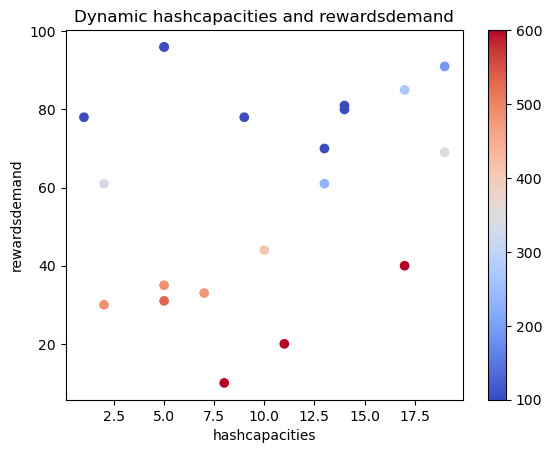

In [102]:
plt.xlabel('hashcapacities');
plt.ylabel('rewardsdemand');
plt.title('Dynamic hashcapacities and rewardsdemand')
plt.scatter(hashcapacities, rewardsdemand, c=total_rewards, cmap='coolwarm',vmax=600,vmin=100)
plt.colorbar()